# Task 3: Exploratory Data Analysis :Retail(Beginner)


# THE SPARKS FOUNDATION

# KHUSHI CHHAJED

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# now we will load the data
data=pd.read_csv(r'C:\Users\pavilion\Downloads\SampleSuperstore.csv')

In [9]:
data.head()
# to see the top 5 enteries of data.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
# firstly checking the missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# OBSERVATION : From this we see some useful information linke min sales=1040 , max sales=99301 , min profit =-6599 ,max profit=8399 and much more

In [13]:
# now lets see the total sales and toral profit 
print('Total Sales are {} and Total profit is {}'.format(data['Sales'].sum(),data['Profit'].sum()))

Total Sales are 2297200.8603000003 and Total profit is 286397.0217


# Country

In [14]:
# now lets see how many countries are there
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

# OBSERVATION: since there is only a single country therefore there is no need for this column and also postal code and hence we will drop this from our dataset

In [15]:
data=data.drop(['Country','Postal Code'],axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

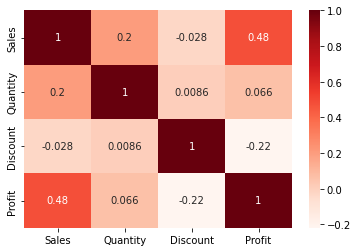

In [16]:
sns.heatmap(data.corr(),annot = True, cmap = 'Reds')

In [17]:
# From this heatmap we see the correlation betwwen all features with each other.
# now lets take every feature and analyse it seperately and find some good observations and solutions for problems.

# Costumers

In [18]:
data['Segment'].unique().sum()

'ConsumerCorporateHome Office'

<ipython-input-19-7f6fc129e546>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Segment')['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Segment'>

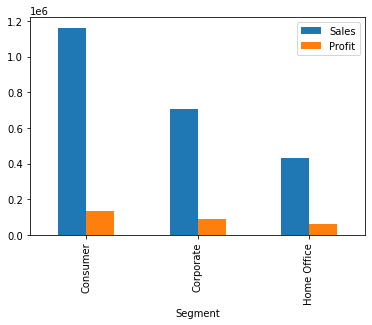

In [19]:
# here we see there are 3 categories in our data ie Consumer ,Corporate Home , Office
data.groupby('Segment')['Sales','Profit'].sum().plot.bar()

# Observation:
Consumer are having maximum sales as well as profit followed by Corporate and Home office
In all the three categories the sales and profit are directly related

<AxesSubplot:xlabel='Segment', ylabel='count'>

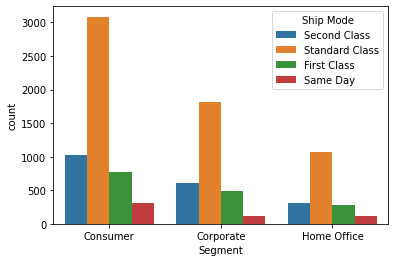

In [20]:
# Now lets see the relation between the segment and ship mode
sns.countplot(x='Segment',hue='Ship Mode',data=data)

# OBSERVATION:
Here we see that most of the transactions are done using Standard Class for all of the segment categories.

# REGION

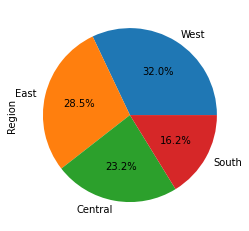

In [21]:
data['Region'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

# OBSERVATION :
West region has the maximum transaction and least by South region

<ipython-input-22-f06c5d4f2034>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Region'>

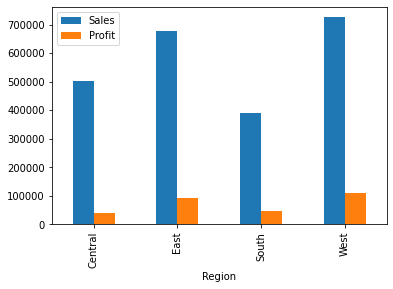

In [22]:
data.groupby('Region')['Sales','Profit'].sum().plot.bar()

# Observation:
West region having maximum sales as well as maximum profit.
While South has least sales and least profit and same for others.

# products

<ipython-input-23-6f0c73e79237>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Sales','Profit'].sum().plot.bar()


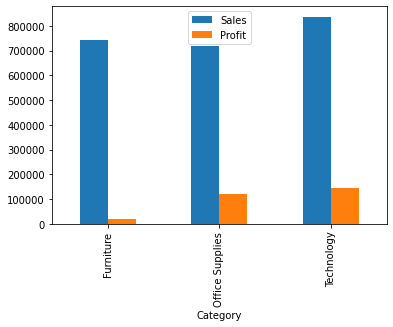

In [23]:
data.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.show()

<ipython-input-24-0eaf87bbc312>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()


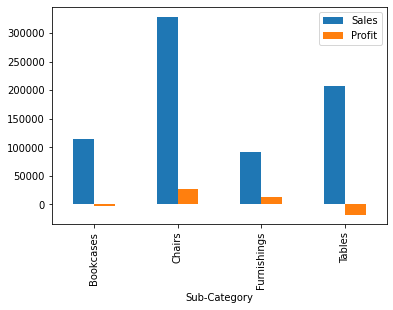

In [24]:
data[data['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()
plt.show()

# OBSERVATION
1.Chairs are having maximum sales and maximum profit

2.Book cases and tables are facing loss which is affecting the whole category furniture.

<AxesSubplot:xlabel='Sub-Category'>

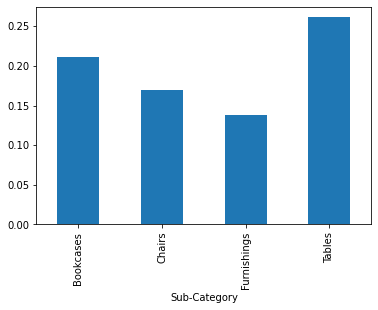

In [26]:
## now lets see why are these two subcategories facing loss by comparing them with discount
data[data['Category']=='Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar()

# OBSERVATION
here we see that Bookcases and Tables are having maximum discount ie more than 20%

<AxesSubplot:>

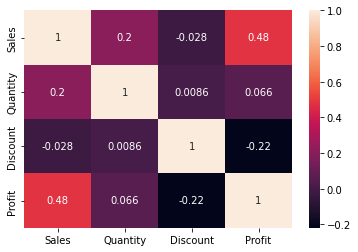

In [27]:
sns.heatmap(data.corr(),annot=True)

# observation

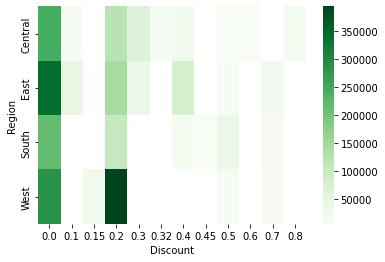

In [28]:
sales_coz_discount = pd.pivot_table(data = data, index = 'Region', columns = 'Discount', values = 'Sales', aggfunc = 'sum')
sns.heatmap(sales_coz_discount, cmap = 'Greens')
plt.show()

# OBSERVATION
Its clearly visible that after an discount of 20% there is not much sales So we found that tables and bookcases are having an discount of 20% and more but the sles are not going high after 20% discount this is the reason of loss in furniture category

# SOLUTION
We should decrease the average discount of the tables and bookcases from 20% to increase sales

# solution

In [29]:
# Now lets analyse state and city
data['State'].value_counts().count()

49

In [30]:
data['City'].value_counts().count()

531

# OBSERVATION
the company sells its products in 49 states and 531 cities

# top products

Text(0, 0.5, 'Sales')

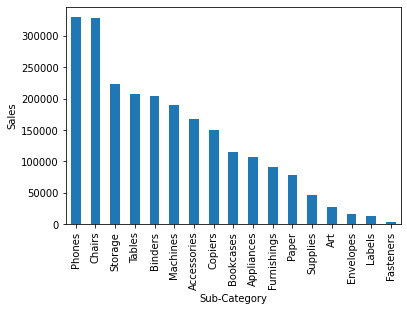

In [31]:
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending =False).plot.bar()
plt.ylabel('Sales')

# OBSERVATION
we see that phones and chairs are having maximum sales

Text(0, 0.5, 'Profit')

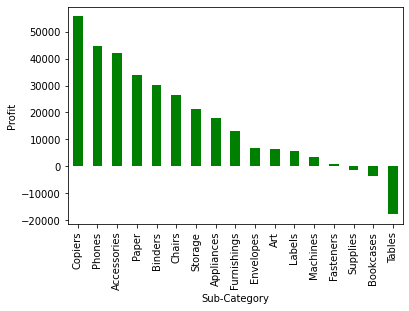

In [32]:
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending =False).plot.bar(color='g')
plt.ylabel('Profit')

# OBSERVATION
We see that Bookcases and Tables are having loss among all

Text(0, 0.5, 'Discount')

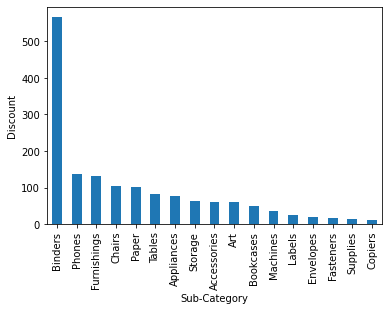

In [33]:
data.groupby('Sub-Category')['Discount'].sum().sort_values(ascending =False).plot.bar()
plt.ylabel('Discount')

# OBSERVATION
Blinders have got the most discount of all items.

# quantity

In [34]:
print("TOP 5 PERFORMING PRODUCTS ")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head())

TOP 5 PERFORMING PRODUCTS 
Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Name: Quantity, dtype: int64


In [35]:
print(" LEAST 5 PERFORMING PRODUCTS")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).tail())

 LEAST 5 PERFORMING PRODUCTS
Sub-Category
Envelopes    906
Bookcases    868
Supplies     647
Machines     440
Copiers      234
Name: Quantity, dtype: int64


# ALL OBSERVATIONS
min sales=1040 , max sales=99301 , min profit =-6599 ,max profit=8399 2.total sales of company is 2297200 and total profit is 286397 3.since there is only a single country therefore there is no need for this column and also postal code and hence we will drop this from our dataset 4.Consumer are having maximum sales as well as profit followed by Corporate and Home office 5.In all the three categories the sales and profit are directly related 6.Most of the transactions are done using Standard Class for all of the segment categories. 7.West region has the maximum transaction and least by South region 8.West region having maximum sales as well as maximum profit. 9.While South has least sales and least profit and same for others. 10.Chairs are having maximum sales and maximum profit 11.Book cases and tables are facing loss which is affecting the whole category furniture. 12.Bookcases and Tables are having maximum discount ie more than 20% 13.n heatmap the correlation between Discount and sales is negative And also the coorelation between profit discount is negative 14.Its clearly visible that after an discount of 20% there is not much sales So we found that tables and bookcases are having an discount of 20% and more but the sles are not going high after 20% discount this is the reason of loss in furniture category 15.the company sells its products in 49 states and 531 cities 16.we see that phones and chairs are having maximum sales 17.Blinders have got the most discount of all items.

# CONCLUSION
We can increase the profits of furniture category by decreasing the average discounts given to the tables and bookcases under 20%.